<a href="https://colab.research.google.com/github/MALLI7622/Deep-Learning-with-PyTorch/blob/master/Image_Denoising_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Denoising using Deep Learning


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision

In [2]:
transform_train = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([ 
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10( root = './cifar10', train = True, 
                                       download = True, transform = transform_train)

testset = torchvision.datasets.CIFAR10( root = './cifar10', train = False, 
                                       download = True, transform = transform_train)

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [4]:
batch_size = 16

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [6]:
dataset = iter(trainloader)
print(dataset)
images, labels = dataset.next()

print(images.shape)
print(images[1].shape)
print(labels[0])

torch.Size([16, 3, 32, 32])
torch.Size([3, 32, 32])
tensor(7)


In [7]:
def visualize_data(data):

    for i, data in enumerate(data, 0):
        k = np.random.randint(16)
        images, labels = data
        images = images.numpy()
        image = np.transpose(images[k], (1, 2, 0))
        noise = np.random.normal(loc = 0.52, scale= 0.12, size = images.shape)
        noise_images = images + noise
        torch_noise_images = torch.from_numpy(noise_images)
        npimg = torch_noise_images[k].numpy()
        npimg = np.transpose(npimg, (1, 2, 0))
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
        ax1.imshow(image)
        ax2.imshow(npimg)

        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


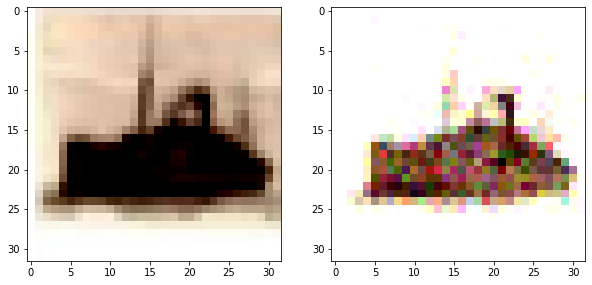

In [8]:
visualize_data(trainloader)

In [39]:

class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, 3),
            nn.ReLU(),
            nn.Conv2d(6, 16, 3),
            nn.ReLU())
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16, 6, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 3),
            nn.ReLU())
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [252]:
epochs = 100
net = Network().to(device)
loss_fn = nn.MSELoss()
opt = optim.SGD(net.parameters(), lr = 0.1) 

In [254]:
%%time
loss_on_epochs = []
for epoch in range(epochs):
    for data in trainloader:
        images, _ = data

        images_copy = images.numpy()
        noise = np.random.normal(loc = 0.52, scale= 0.12, size = images_copy.shape)
        noise_images = images_copy + noise
        torch_noise_images = torch.from_numpy(noise_images)
        images = images.to(device)

        torch_noise_images = torch_noise_images.to(device)
       
        output = net(torch_noise_images.float())
        
        loss = loss_fn(output, images)
        opt.zero_grad()
        loss.backward()
        opt.step()
    loss_on_epochs.append(loss.item())
    if (epoch + 1) % 10 == 0:
      print('epoch {}/{} ========> loss:{:.4f}'.format(epoch+1, epochs, loss.item()))

epoch 10/100 ========> loss:0.1801
epoch 20/100 ========> loss:0.1828
epoch 30/100 ========> loss:0.1746
epoch 40/100 ========> loss:0.1664
epoch 50/100 ========> loss:0.2126
epoch 60/100 ========> loss:0.2030
epoch 70/100 ========> loss:0.1326
epoch 80/100 ========> loss:0.1128
epoch 90/100 ========> loss:0.1157
epoch 100/100 ========> loss:0.1114
CPU times: user 33min 45s, sys: 25.7 s, total: 34min 11s
Wall time: 34min 19s


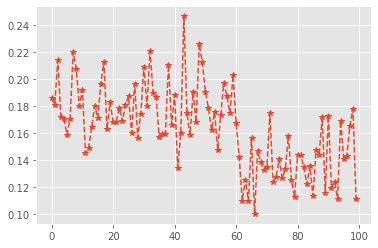

In [256]:
#print(loss_on_epochs)
plt.style.use('ggplot')
plt.plot(loss_on_epochs, '*--')

In [257]:
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

In [258]:
data = iter(testloader)
img, _ = data.next()
print(img.shape)
print(img[1].shape)

torch.Size([16, 3, 32, 32])
torch.Size([3, 32, 32])


In [259]:
datatest = iter(testloader)

images, _ = datatest.next()

images_copy = images.numpy().copy()
noise = np.random.normal( loc = 0.52, scale = 0.12, size= images_copy.shape)


noisy_images = images_copy + noise

torch_noisy_images = torch.from_numpy(noisy_images).to(device)

predictions = net(torch_noisy_images.float())
print(predictions.shape)


torch.Size([16, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([16, 32, 32, 3])
torch.Size([16, 32, 32, 3])
torch.Size([16, 32, 32, 3])


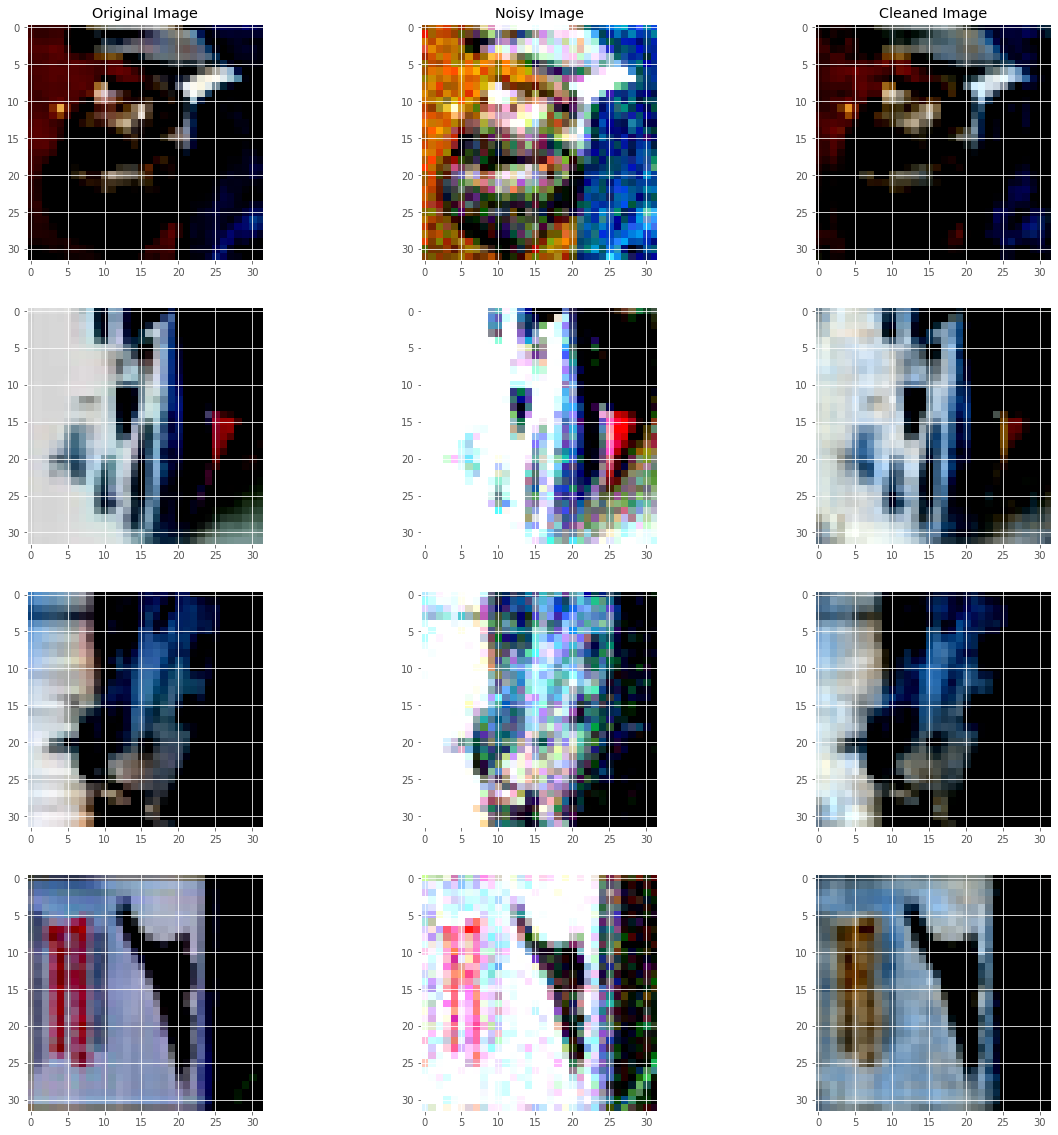

In [260]:

fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax[0, 0].set_title("Original Image")
ax[0, 1].set_title("Noisy Image")
ax[0, 2].set_title("Cleaned Image")

images = images.permute(0, 3, 2, 1)
print(images.shape)
torch_noisy_images = torch_noisy_images.permute(0, 3, 2, 1)
print(torch_noisy_images.shape)
predictions = predictions.permute(0, 3, 2, 1)
print(predictions.shape)

for i in range(4):

  ax[i, 0].imshow(images[i].cpu().detach().numpy())
  ax[i, 1].imshow(torch_noisy_images[i].cpu().detach().numpy())
  ax[i, 2].imshow(predictions[i].cpu().detach().numpy()) 


In [161]:
%%time
learning_rates = [0.1, 0.1, 0.01, 0.01, 0.001, 0.001, 0.0001, 0.0001, 0.00001,0.00001]
optimisers = [optim.SGD(net.parameters(), lr = 0.1), optim.Adam(net.parameters(), lr = 0.1),
              optim.SGD(net.parameters(), lr = 0.01), optim.Adam(net.parameters(), lr = 0.01),
              optim.SGD(net.parameters(), lr = 0.001), optim.Adam(net.parameters(), lr = 0.001),
              optim.SGD(net.parameters(), lr = 0.0001), optim.Adam(net.parameters(), lr = 0.0001),
              optim.SGD(net.parameters(), lr = 0.00001), optim.Adam(net.parameters(), lr = 0.00001)]

loss_optim_results = dict()
for i, optimizer in tqdm(enumerate(optimisers)):
  if (i+1) % 2 != 0.0:
    string = "loss_results_SGD_"+ str(learning_rates[i])
  else:  
    string = "loss_results_Adam_"+ str(learning_rates[i-1])
  print("Optimizer with learning rate =======>", string[13:])
  epochs = 20
  loss_on_epochs = []
  for epoch in range(epochs):
      for data in trainloader:

        images, _ = data

        images_copy = images.numpy()
        noise = np.random.normal(loc = 0.52, scale= 0.12, size = images_copy.shape)
        noise_images = images_copy + noise
        torch_noise_images = torch.from_numpy(noise_images)
        images = images.to(device)

        torch_noise_images = torch_noise_images.to(device)
        
        output = net(torch_noise_images.float())
          
        loss = loss_fn(output, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
      loss_on_epochs.append(round(loss.item(), 4))
  loss_optim_results[string] = loss_on_epochs
      
 













0it [00:00, ?it/s]

Optimizer with learning rate =======> SGD_0.1














1it [06:53, 413.61s/it]

Optimizer with learning rate =======> Adam_0.1














2it [14:41, 430.01s/it]

Optimizer with learning rate =======> SGD_0.01














3it [21:52, 430.10s/it]

Optimizer with learning rate =======> Adam_0.01














4it [29:46, 443.45s/it]

Optimizer with learning rate =======> SGD_0.001














5it [37:03, 441.48s/it]

Optimizer with learning rate =======> Adam_0.001














6it [45:18, 457.62s/it]

Optimizer with learning rate =======> SGD_0.0001














7it [52:38, 452.31s/it]

Optimizer with learning rate =======> Adam_0.0001














8it [1:00:33, 458.95s/it]

Optimizer with learning rate =======> SGD_1e-05














9it [1:07:48, 451.89s/it]

Optimizer with learning rate =======> Adam_1e-05














10it [1:15:54, 455.44s/it]

CPU times: user 1h 14min 44s, sys: 52.5 s, total: 1h 15min 37s
Wall time: 1h 15min 54s


In [170]:
loss_optim_results.keys()

dict_keys(['loss_results_SGD_0.1', 'loss_results_Adam_0.1', 'loss_results_SGD_0.01', 'loss_results_Adam_0.01', 'loss_results_SGD_0.001', 'loss_results_Adam_0.001', 'loss_results_SGD_0.0001', 'loss_results_Adam_0.0001', 'loss_results_SGD_1e-05', 'loss_results_Adam_1e-05'])

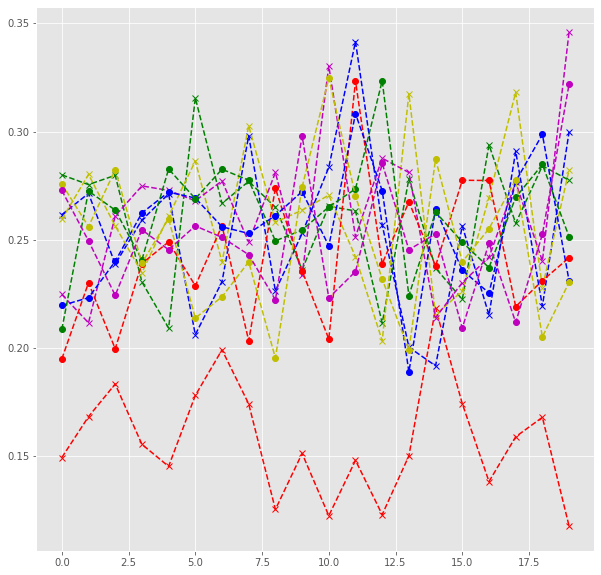

In [218]:

plt.figure(figsize= (10 , 10))
plt.plot((loss_optim_results['loss_results_SGD_0.1']), 'x--',  color = 'r')
plt.plot((loss_optim_results['loss_results_SGD_0.01']), 'x--', color = 'b')
plt.plot((loss_optim_results['loss_results_SGD_0.001']), 'x--', color = 'g')
plt.plot((loss_optim_results['loss_results_SGD_0.0001']), 'x--', color = 'y')
plt.plot((loss_optim_results['loss_results_SGD_1e-05']), 'x--', color = 'm')


plt.plot((loss_optim_results['loss_results_Adam_0.1']), 'o--',  color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_0.01']), 'o--', color = 'b')
plt.plot((loss_optim_results['loss_results_Adam_0.001']), 'o--', color = 'g')
plt.plot((loss_optim_results['loss_results_Adam_0.0001']), 'o--', color = 'y')
plt.plot((loss_optim_results['loss_results_Adam_1e-05']), 'o--', color = 'm')


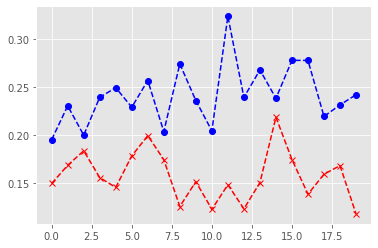

In [220]:
plt.plot((loss_optim_results['loss_results_SGD_0.1']), 'x--',  color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_0.1']), 'o--',  color = 'b')

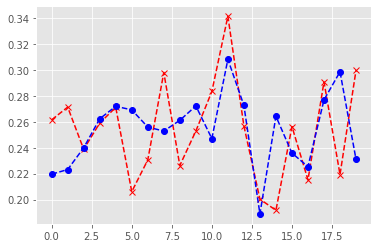

In [221]:
plt.plot((loss_optim_results['loss_results_SGD_0.01']), 'x--', color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_0.01']), 'o--', color = 'b')

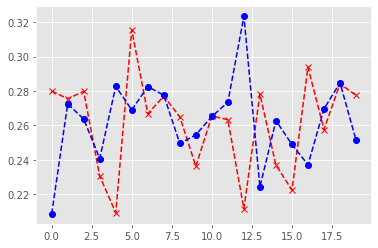

In [222]:
plt.plot((loss_optim_results['loss_results_SGD_0.001']), 'x--', color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_0.001']), 'o--', color = 'b')

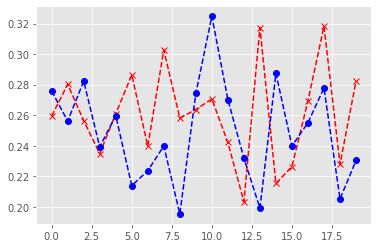

In [223]:
plt.plot((loss_optim_results['loss_results_SGD_0.0001']), 'x--', color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_0.0001']), 'o--', color = 'b')

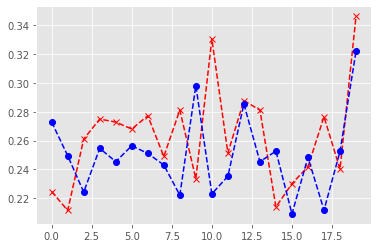

In [225]:
plt.plot((loss_optim_results['loss_results_SGD_1e-05']), 'x--', color = 'r')
plt.plot((loss_optim_results['loss_results_Adam_1e-05']), 'o--', color = 'b')